# Table of Contents
 <p><div class="lev2"><a href="#2.7.1-問題を知る"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>2.7.1 問題を知る</a></div><div class="lev3"><a href="#凸関数と非凸関数"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>凸関数と非凸関数</a></div><div class="lev3"><a href="#なめらかであるか"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>なめらかであるか</a></div><div class="lev3"><a href="#ノイズがあるか"><span class="toc-item-num">0.1.3&nbsp;&nbsp;</span>ノイズがあるか</a></div><div class="lev3"><a href="#拘束条件があるか"><span class="toc-item-num">0.1.4&nbsp;&nbsp;</span>拘束条件があるか</a></div><div class="lev2"><a href="#2.7.2-様々な最適化のレビュー"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>2.7.2 様々な最適化のレビュー</a></div><div class="lev3"><a href="#手始めに：一次元最適化"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>手始めに：一次元最適化</a></div><div class="lev3"><a href="#勾配に基づく方法"><span class="toc-item-num">0.2.2&nbsp;&nbsp;</span>勾配に基づく方法</a></div><div class="lev4"><a href="#勾配降下についての直感"><span class="toc-item-num">0.2.2.1&nbsp;&nbsp;</span>勾配降下についての直感</a></div>

[scipy Lecture Note 2.7. 数学的最適化: 関数の最小値を求める](http://www.turbare.net/transl/scipy-lecture-notes/advanced/mathematical_optimization/index.html)

## 2.7.1 問題を知る
最適化の問題は何次元なのか、と次の4つの基準で分けることができます。

### 凸関数と非凸関数
凸関数:

* fはすべて接線の上に位置する
* つまり2点A、Bに対して、A<C<Bであるならば、f(A)≦f(C)≦f(B)

凸関数では、局所最小値が大域的な最小値であるので最適化は簡単です。

### なめらかであるか
なめらかな関数：勾配がいたるところで定義され、連続な関数

なめらかな関数のほうがたいてい最適化が簡単です。

### ノイズがあるか
多くの最適化手法が目的関数の勾配を利用します。勾配関数が与えられない場合は数値的に計算されますが、これによってエラーが増えます。

### 拘束条件があるか


## 2.7.2 様々な最適化のレビュー
### 手始めに：一次元最適化
Brent法：囲い込み先着と2次近似を組合せた手法。局所最小値を避けられるかどうかは運。

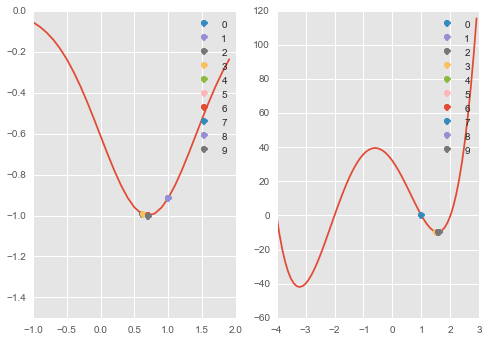

In [34]:
from scipy import optimize
def f(x):
    return -np.exp(-(x - .7) ** 2)

def f2(x):
    return 2*(x+4.)*(x+2.)*(x-1.)*(x-2.)

def plot_iter(func):
    for n_iter in np.arange(10):
        x_min = optimize.brent(func, maxiter=n_iter)
        plt.plot(x_min, func(x_min), 'o', label=str(n_iter))   
    plt.legend()
        
figs, axes = plt.subplots(1, 2)

plt.sca(axes[0])
plt.ylim([-1.5, 0])

xs = np.arange(-1, 2, 0.1)
ys = f(xs)
plt.plot(xs, ys)
plot_iter(f)

plt.sca(axes[1])

xs = np.arange(-4, 3, 0.1)
ys = f2(xs)
plt.plot(xs, ys)
plot_iter(f2)

### 勾配に基づく方法
#### 勾配降下についての直感
Gradient descentは基本的に勾配の方向、最も急な方向に向かって小さく進みます。

異方性が強い関数は最適化が難しいことがわかります。

#### 